# **Assignment#3**
### **Lienar/Logistic Regression with Python**
    Dep  : E-Business
    Code : 201823869
    Name : seongwoo Cho

<br>

#### **INDEX** 

[**1. Linear Regression**](#1-linear-regression)

&nbsp;&nbsp;&nbsp; 1-1. Exploring & Describing <br>
&nbsp;&nbsp;&nbsp; 1-2. Data Processing <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Cleaning missing values <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Converting categorical variables to dummies <br>
&nbsp;&nbsp;&nbsp; 1-3. Model Building <br>
&nbsp;&nbsp;&nbsp; 1-4. Explanations on the model <br>
&nbsp;&nbsp;&nbsp; 1-5. Model Evaluation <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - MAE <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - MSE <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - RMSE <br>

[**2. Logistic Regression**](#2-logistic-regression)

&nbsp;&nbsp;&nbsp; 2-1. Exploring and Describing <br>
&nbsp;&nbsp;&nbsp; 2-2. Data Processing <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Dealing with missing values <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Removing whitespace of col names <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Generating dummies of the categorical variables <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Creating DF only successful or failed <br>
&nbsp;&nbsp;&nbsp; 2-3. Model Building <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Splitting into train and test sets <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Building Logistic Regression model <br>
&nbsp;&nbsp;&nbsp; 2-4. Explanations on the model <br>
&nbsp;&nbsp;&nbsp; 2-5. Model Evaluation <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Confusion Matrix <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - accuracy & precision <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Suggestion for improving
<br>

---

<br>

## **1. Linear Regression**
The main purpose of this section is building a linear regression model for predicting 'DV:readingScore' by using the other variables.
It includes EDA, Cleaning, Building Model, Explanations, and Model Evaluation.
<br><br>

### Preparing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pisa_train = pd.read_csv('pisa2009train.csv')
pisa_test = pd.read_csv('pisa2009test.csv')

<br>

### 1-1. Exploring & Describing

***Data** : The Program for International Student Assessment (PISA) is a test given to 15-year-old students around the world to evaluate their performance in mathematics, reading, and science every three years. The test provides a quantitative way to compare the performance of students globally. You need to predict the reading scores of the U.S. students on the 2009 PISA exam.*

In [25]:
pisa_train.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89


In [26]:
pisa_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3663 entries, 0 to 3662
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  3663 non-null   int64  
 1   male                   3663 non-null   int64  
 2   raceeth                3628 non-null   object 
 3   preschool              3607 non-null   float64
 4   expectBachelors        3601 non-null   float64
 5   motherHS               3566 non-null   float64
 6   motherBachelors        3266 non-null   float64
 7   motherWork             3570 non-null   float64
 8   fatherHS               3418 non-null   float64
 9   fatherBachelors        3094 non-null   float64
 10  fatherWork             3430 non-null   float64
 11  selfBornUS             3594 non-null   float64
 12  motherBornUS           3592 non-null   float64
 13  fatherBornUS           3550 non-null   float64
 14  englishAtHome          3592 non-null   float64
 15  comp

In [27]:
pisa_train.describe()

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
count,3663.000000,3663.000000,3607.000000,3601.000000,3566.000000,3266.000000,3570.000000,3418.000000,3094.000000,3430.000000,...,3592.000000,3598.000000,3629.000000,3477.000000,3414.000000,3520.000000,3663.000000,3663.000000,3501.000000,3663.000000
mean,10.089817,0.511057,0.722761,0.785893,0.879978,0.348132,0.734454,0.859274,0.331933,0.853061,...,0.871659,0.899389,0.289887,266.208225,24.499414,0.967614,0.933934,0.384930,1369.316767,497.911403
std,0.554375,0.499946,0.447697,0.410259,0.325033,0.476451,0.441685,0.347789,0.470983,0.354096,...,0.334515,0.300855,0.453772,148.403525,7.184348,0.177049,0.248431,0.486645,869.983618,95.515153
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,100.000000,168.550000
25%,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,225.000000,20.000000,1.000000,1.000000,0.000000,712.000000,431.705000
50%,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,250.000000,25.000000,1.000000,1.000000,0.000000,1212.000000,499.660000
75%,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,300.000000,30.000000,1.000000,1.000000,1.000000,1900.000000,566.230000
max,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2400.000000,75.000000,1.000000,1.000000,1.000000,6694.000000,746.000000


In [28]:
pisa_train.isnull().sum()

grade                      0
male                       0
raceeth                   35
preschool                 56
expectBachelors           62
motherHS                  97
motherBachelors          397
motherWork                93
fatherHS                 245
fatherBachelors          569
fatherWork               233
selfBornUS                69
motherBornUS              71
fatherBornUS             113
englishAtHome             71
computerForSchoolwork     65
read30MinsADay            34
minutesPerWeekEnglish    186
studentsInEnglish        249
schoolHasLibrary         143
publicSchool               0
urban                      0
schoolSize               162
readingScore               0
dtype: int64

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3658,9,1,White,0.0,1.0,1.0,NaN,0.0,1.0,1.0,...,1.0,1.0,0.0,250.0,20.0,1.0,1,0,421.0,509.99
3659,9,1,White,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,450.0,16.0,1.0,1,0,1317.0,444.90
3660,10,1,Hispanic,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,225.0,16.0,1.0,1,1,539.0,476.89
3661,11,1,Black,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,1.0,1.0,0.0,54.0,36.0,1.0,1,1,NaN,363.61


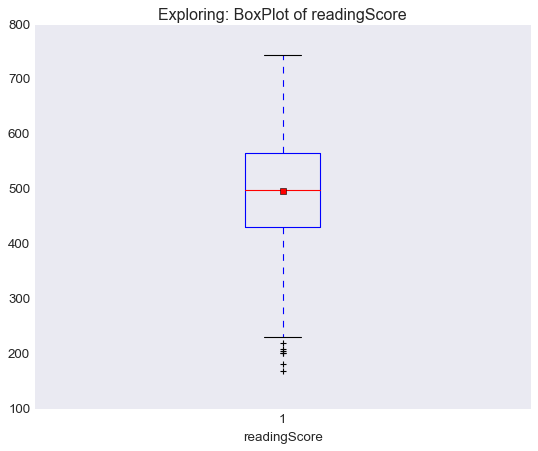

In [33]:
# Box plot 
# for reading score
plt.style.use('seaborn-dark')

plt.boxplot(pisa_train['readingScore'],showmeans=True)
plt.title('Exploring: BoxPlot of readingScore')
plt.xlabel('readingScore')
pisa_train

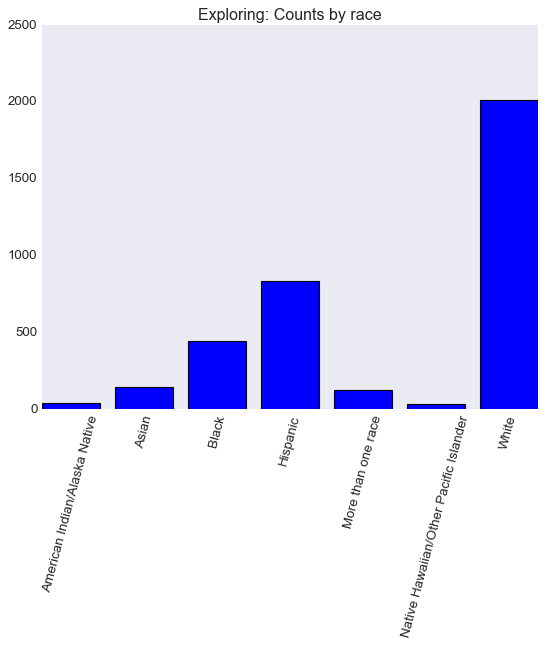

In [48]:
# bar chart
# showing race counts
pisa_train_race = pisa_train.groupby('raceeth')['raceeth'].count()

plt.title('Exploring: Counts by race')
plt.xticks(rotation=75)
plt.bar(pisa_train_race.index,pisa_train_race.values)
plt.show()

raceeth
American Indian/Alaska Native             432.688919
Black                                     438.681464
Hispanic                                  464.601966
More than one race                        498.505161
Native Hawaiian/Other Pacific Islander    511.366774
White                                     523.859122
Asian                                     542.952238
Name: readingScore, dtype: float64


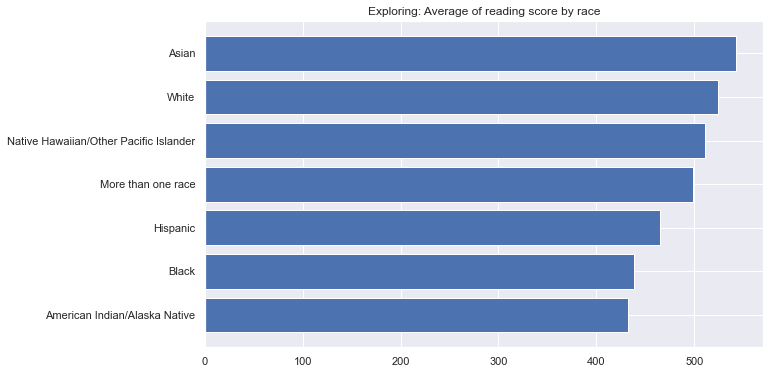

In [13]:
# barchart
# showing average score by race

pisa_avgScore_byRace = pisa_train.groupby('raceeth')['readingScore'].mean().sort_values(ascending=True)
print(pisa_avgScore_byRace)

plt.figure(figsize=(10,6))
plt.title('Exploring: Average of reading score by race')
plt.barh(pisa_avgScore_byRace.index,pisa_avgScore_byRace.values)
plt.show()

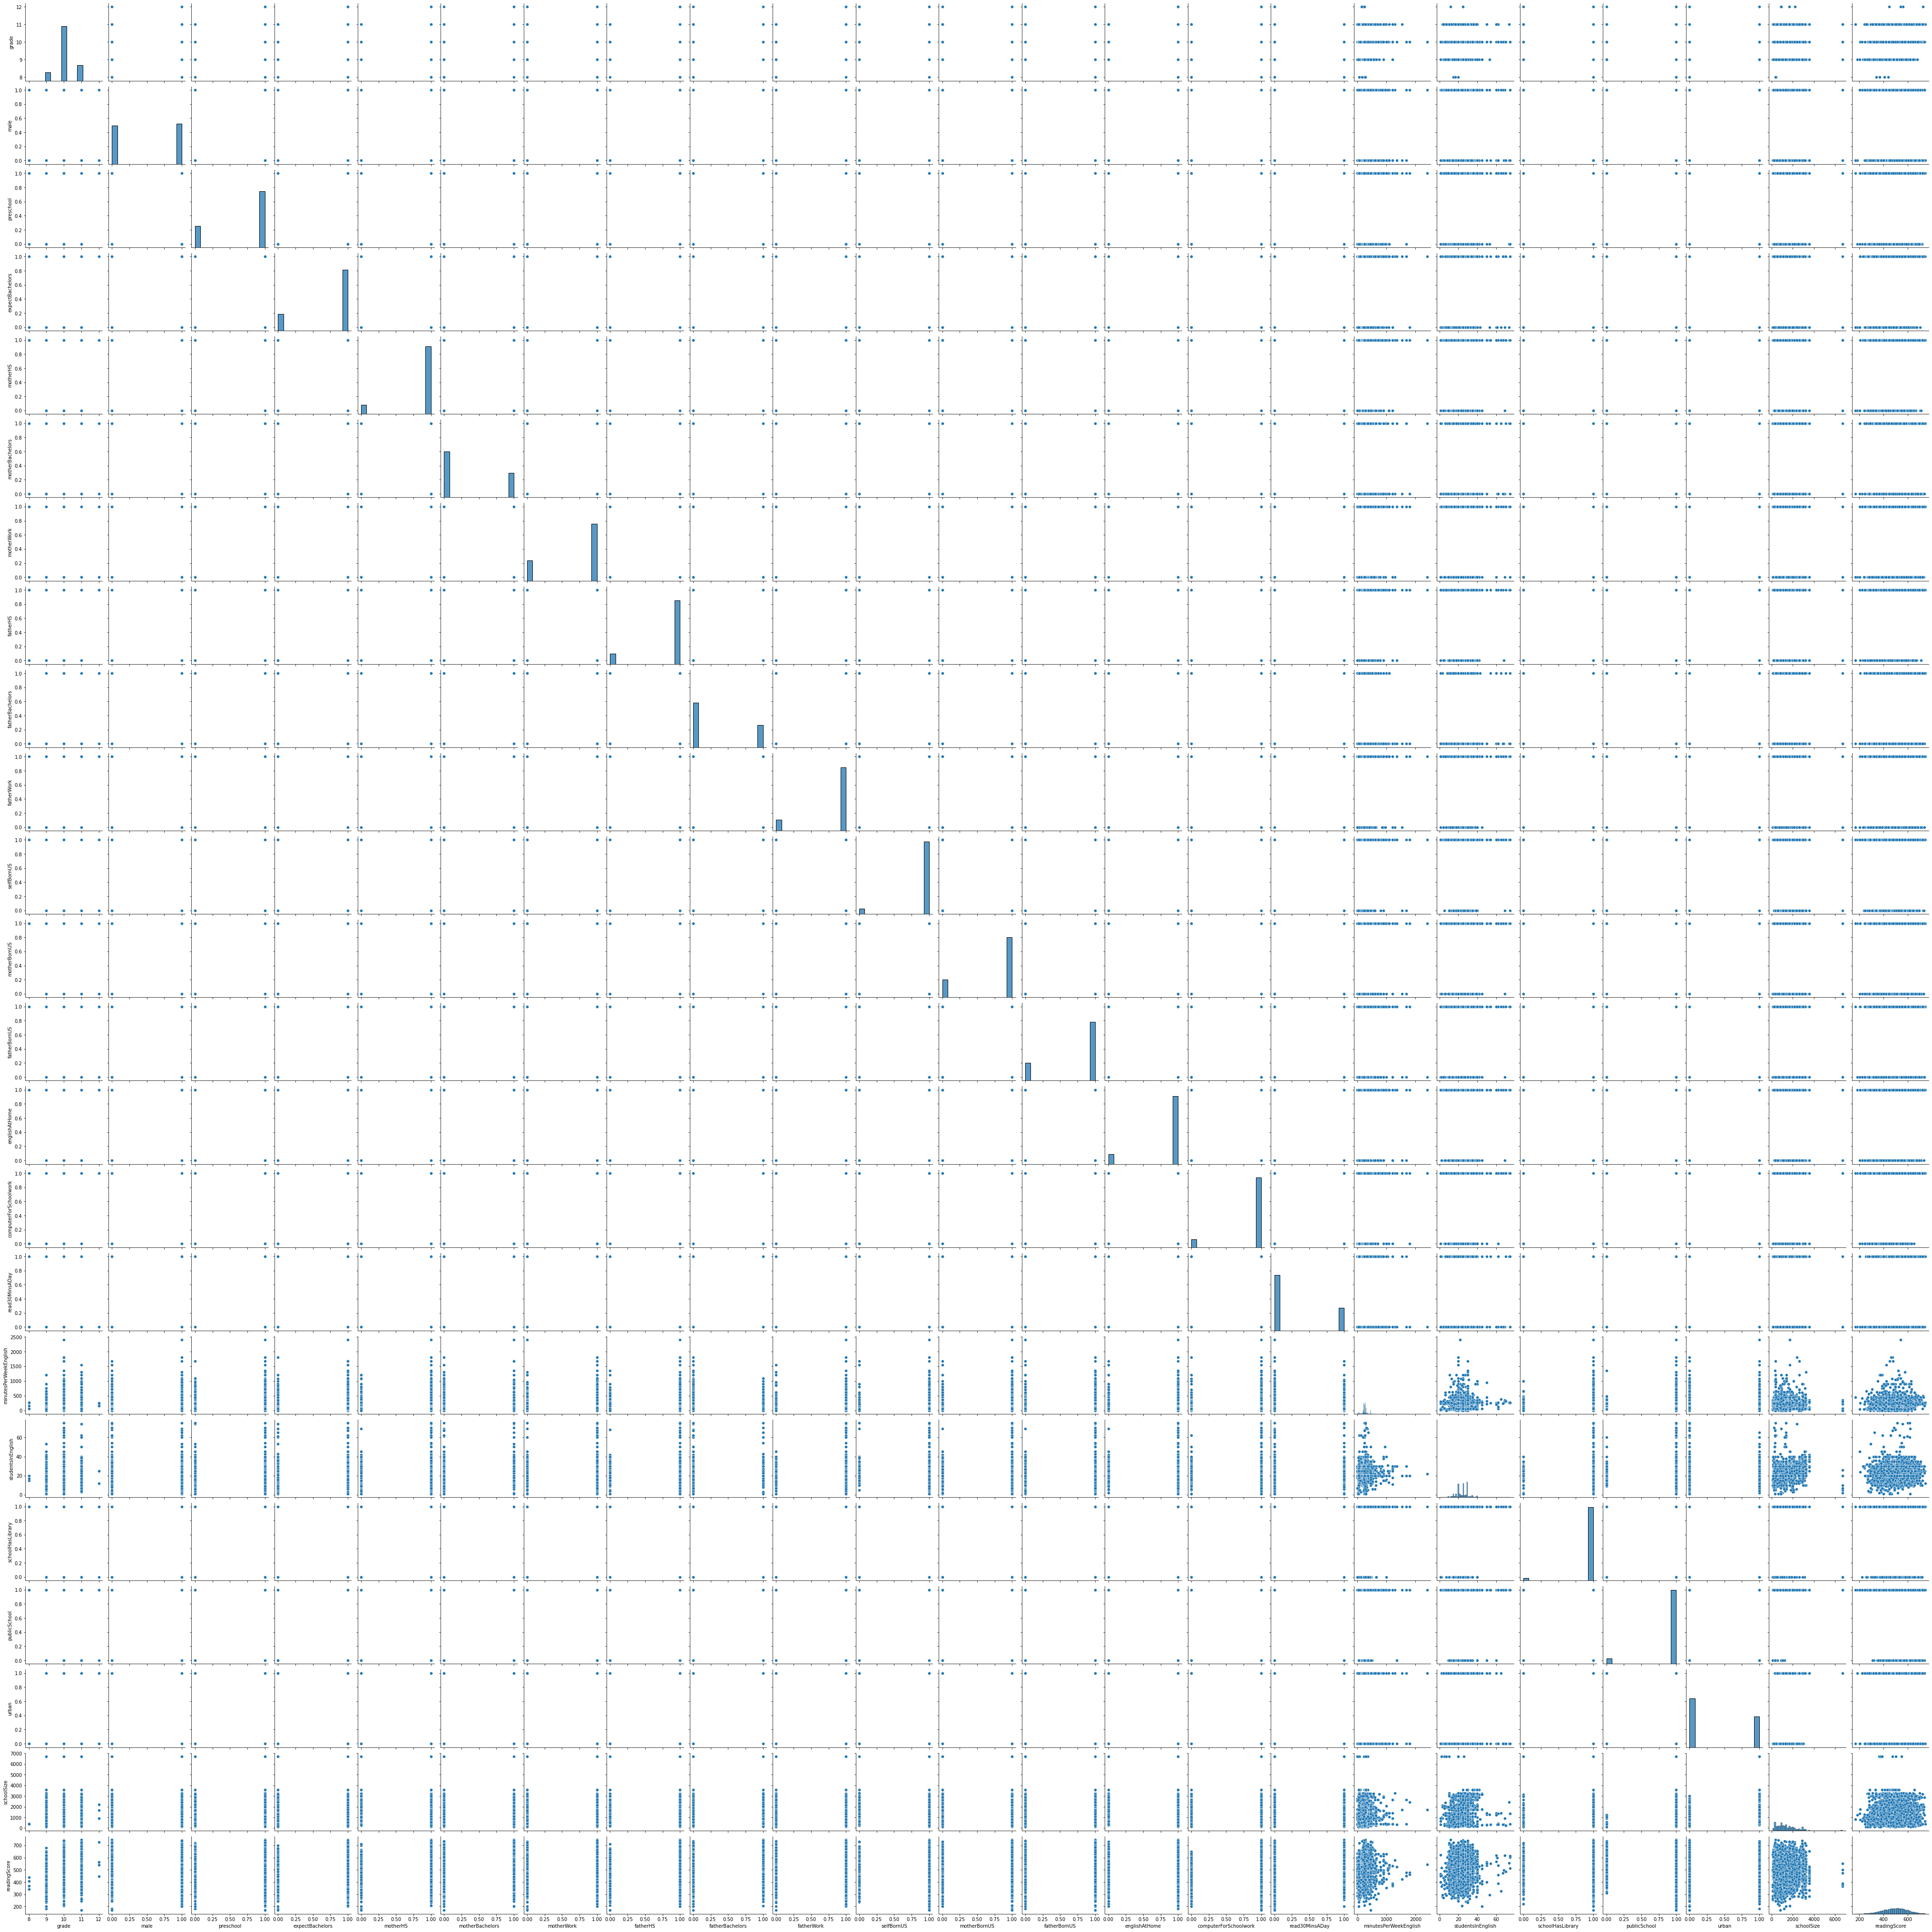

In [15]:
sns.pairplot(pisa_train)

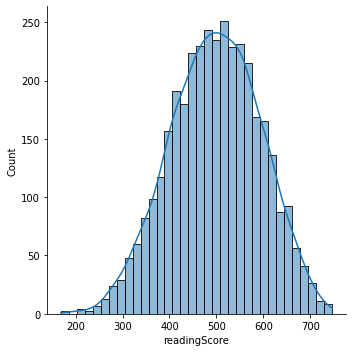

In [16]:
sns.displot(data=pisa_train, x='readingScore',kde=True)

<AxesSubplot:>

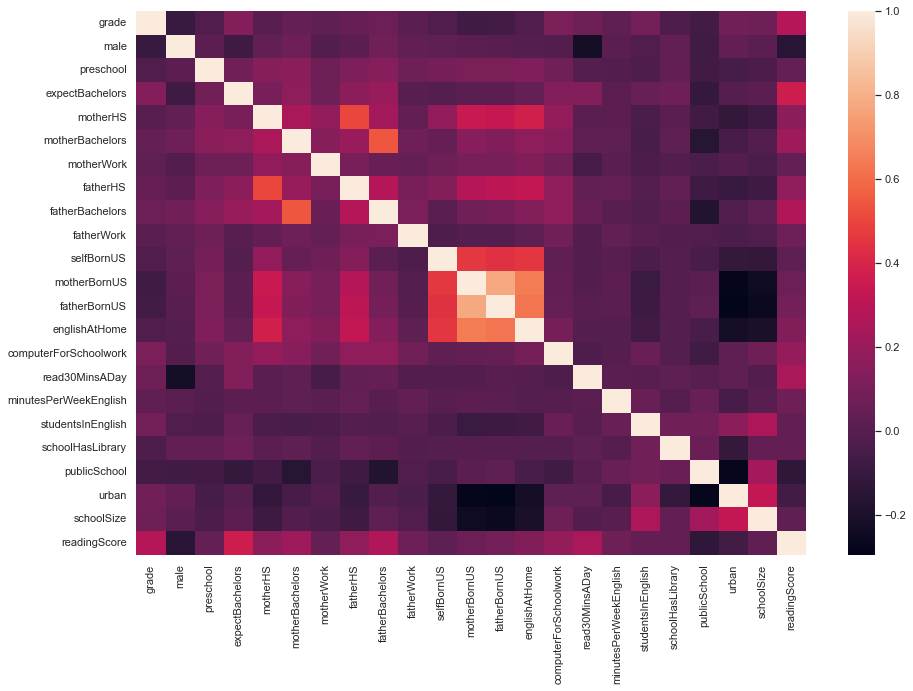

In [14]:

sns.set(rc = {'figure.figsize': (15,10)})
sns.heatmap(pisa_train.corr())

<br>

### 1-2. Data Cleaning

In [5]:
a = pd.array([1,2,3])
print(a.size)

3


<br>

### 1-3. Model Building

<br>

### 1-4. Explanations on the model

<br>

### 1-5. Model Evaluation

<br>

<br>

---

<br>

## **2. Logistic Regression**